In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the CSV file
data = pd.read_csv("iris.data")

In [3]:
print(data.shape)
data.head()

(150, 5)


,1,2,3,4,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
target_names = data["class"].unique()
target_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
target = data.iloc[:, -1]
features = data.iloc[:, :-1]

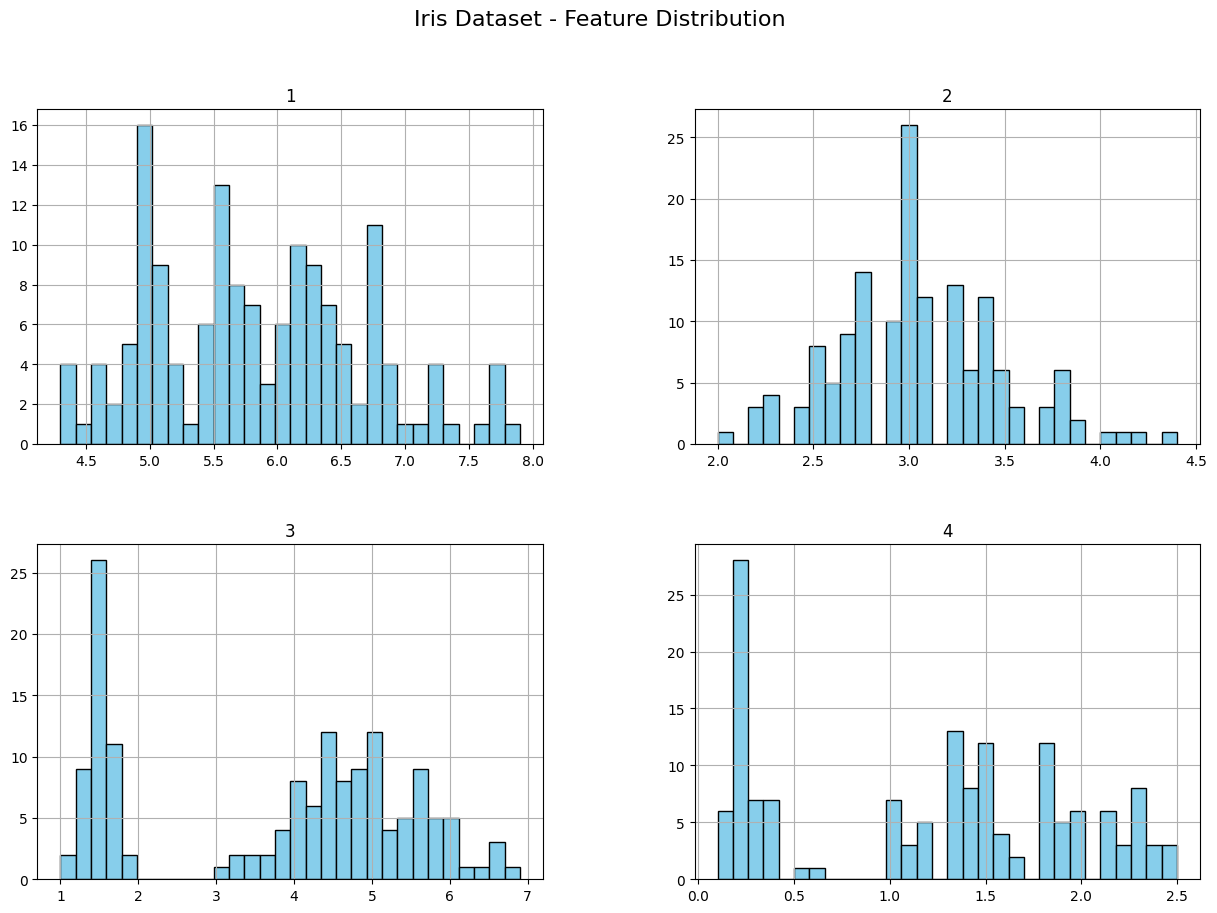

In [6]:
data.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Iris Dataset - Feature Distribution", fontsize=16)
plt.show()

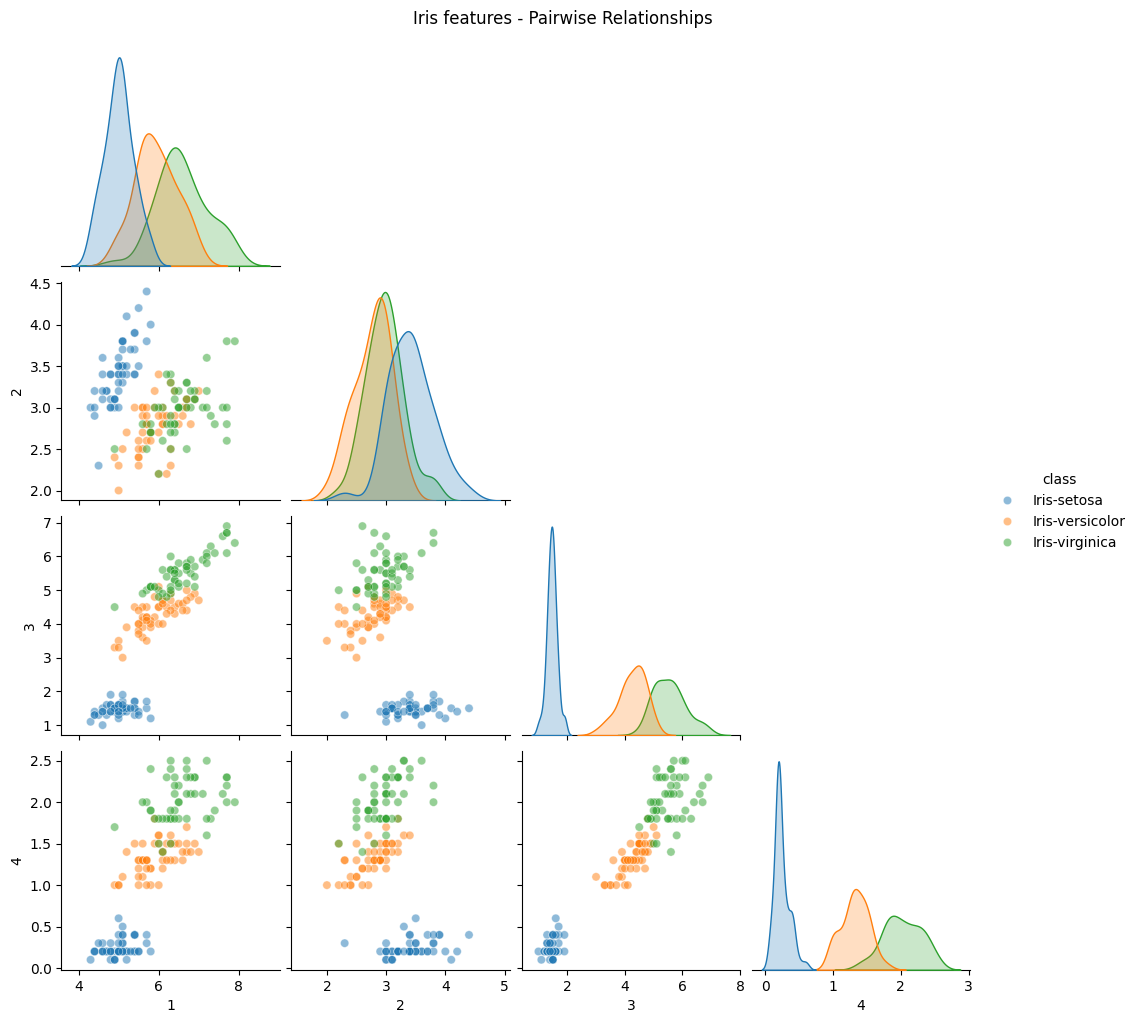

In [7]:
sns.pairplot(data, corner=True, hue="class", diag_kind="kde", plot_kws={"alpha": 0.5})
plt.suptitle("Iris features - Pairwise Relationships", y=1.02)
plt.show()

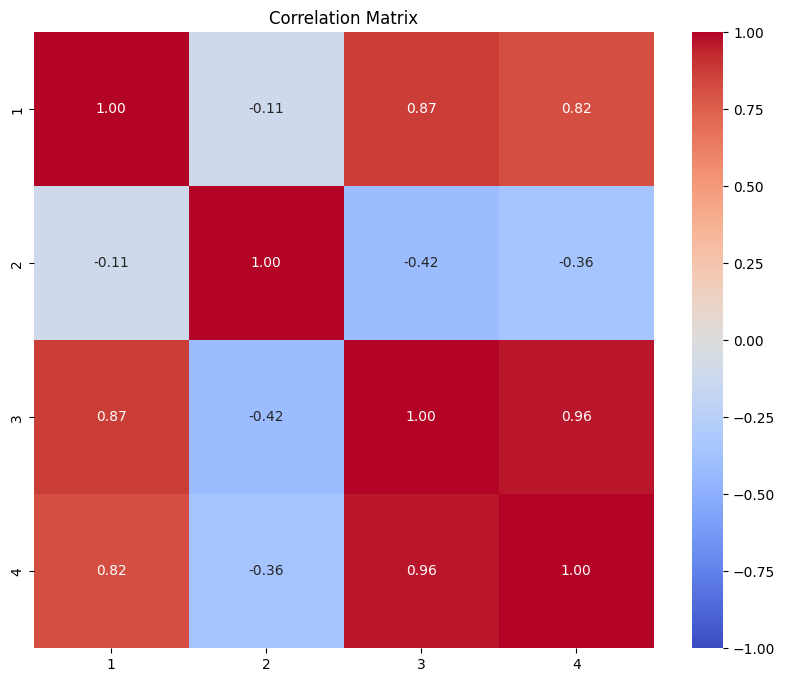

In [8]:
corr_matrix = features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

# Data cleaning

In [9]:
print(data.isnull().any())
data.isnull().any().describe()

1        False
2        False
3        False
4        False
class    False
dtype: bool


count         5
unique        1
top       False
freq          5
dtype: object

In [10]:
class_mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
data["class"] = data["class"].map(class_mapping)
target = data.iloc[:, -1]
features = data.iloc[:, :-1]

# Dymentionality redeuction with LDA

Shape of LDA-transformed data: (150, 2)


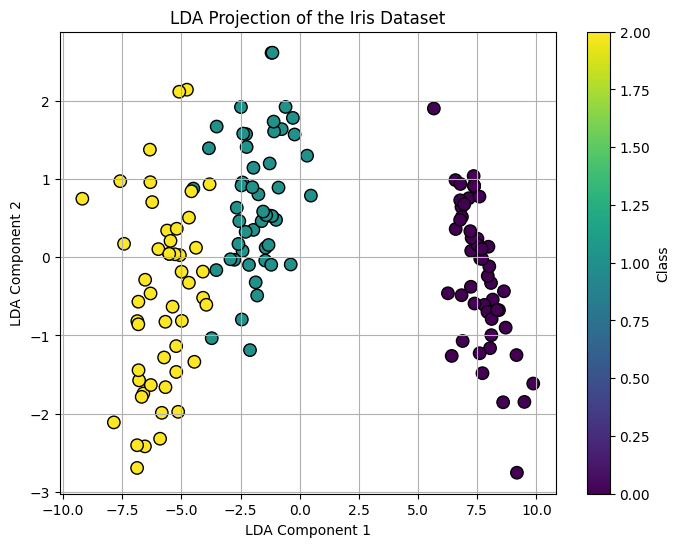

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

lda = LDA(n_components=2)  
X_lda = lda.fit_transform(features, target)

print(f"Shape of LDA-transformed data: {X_lda.shape}")

plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=target, cmap='viridis', edgecolor='k', s=80)
plt.title("LDA Projection of the Iris Dataset")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.colorbar(label='Class')
plt.grid()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [42]:
from sklearn.model_selection import train_test_split
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda, target, test_size=0.2, random_state=42)

# Train models

# Multiclass Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


LR = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

LR.fit(X_train_lda, y_train_lda)

y_pred = LR.predict(X_test_lda)

accuracy = accuracy_score(y_test_lda, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 100.00%

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


/Users/mayaeidelman/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=10, weights="distance")
knn.fit(X_train_lda, y_train)

knn_pred = knn.predict(X_test_lda)

accuracy = accuracy_score(y_test, knn_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, knn_pred, target_names=target_names))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, knn_pred))

Accuracy: 100.00%

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


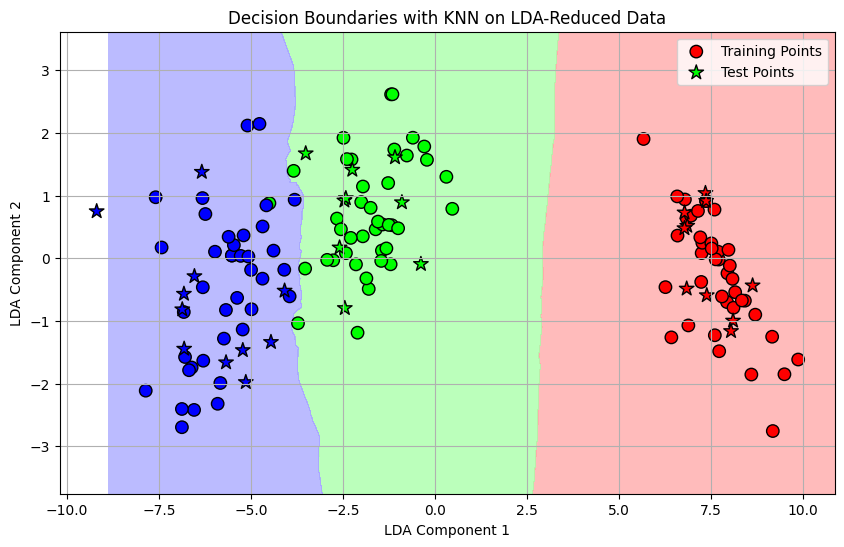

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

x_min, x_max = X_train_lda[:, 0].min() - 1, X_train_lda[:, 0].max() + 1
y_min, y_max = X_train_lda[:, 1].min() - 1, X_train_lda[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
cmap_background = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_points = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_background)
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train_lda, cmap=cmap_points, edgecolor='k', s=80, label="Training Points")
plt.scatter(X_test_lda[:, 0], X_test_lda[:, 1], c=y_test_lda, cmap=cmap_points, edgecolor='k', s=120, marker='*', label="Test Points")

plt.title("Decision Boundaries with KNN on LDA-Reduced Data")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.legend(loc="best")
plt.grid()
plt.show()

# Naive bayes

In [58]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# Train the model
gnb.fit(X_train_lda, y_train_lda)

# Make predictions
y_pred_lda = gnb.predict(X_test_lda)

# Evaluate the model
accuracy = accuracy_score(y_test_lda, y_pred_lda)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test_lda, y_pred_lda))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_lda, y_pred_lda))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Model selection with k-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



models = {
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine (Linear)": SVC(kernel="linear", random_state=42),
    "Support Vector Machine (RBF)": SVC(kernel="rbf", random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)
}

# Set up k-fold cross-validation
k = 5
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Evaluate each model
results = {}
for model_name, model in models.items():
    # Perform k-fold cross-validation
    scores = cross_val_score(model, X_lda, target, cv=kf, scoring='accuracy')
    
    # Store results
    results[model_name] = scores
    
    # Print results
    print(f"Model: {model_name}")
    print(f"Accuracy (mean ± std): {scores.mean():.2f} ± {scores.std():.2f}")
    print("-" * 50)

# Compare model performances
print("\nModel Performance Comparison:")
for model_name, scores in results.items():
    print(f"{model_name}: {scores.mean():.2f} ± {scores.std():.2f}")

Model: Gaussian Naive Bayes
Accuracy (mean ± std): 0.98 ± 0.04
--------------------------------------------------
Model: Decision Tree
Accuracy (mean ± std): 0.97 ± 0.03
--------------------------------------------------
Model: Random Forest
Accuracy (mean ± std): 0.97 ± 0.04
--------------------------------------------------
Model: Support Vector Machine (Linear)
Accuracy (mean ± std): 0.98 ± 0.04
--------------------------------------------------
Model: Support Vector Machine (RBF)
Accuracy (mean ± std): 0.98 ± 0.04
--------------------------------------------------
Model: K-Nearest Neighbors
Accuracy (mean ± std): 0.97 ± 0.04
--------------------------------------------------

Model Performance Comparison:
Gaussian Naive Bayes: 0.98 ± 0.04
Decision Tree: 0.97 ± 0.03
Random Forest: 0.97 ± 0.04
Support Vector Machine (Linear): 0.98 ± 0.04
Support Vector Machine (RBF): 0.98 ± 0.04
K-Nearest Neighbors: 0.97 ± 0.04


# GMM

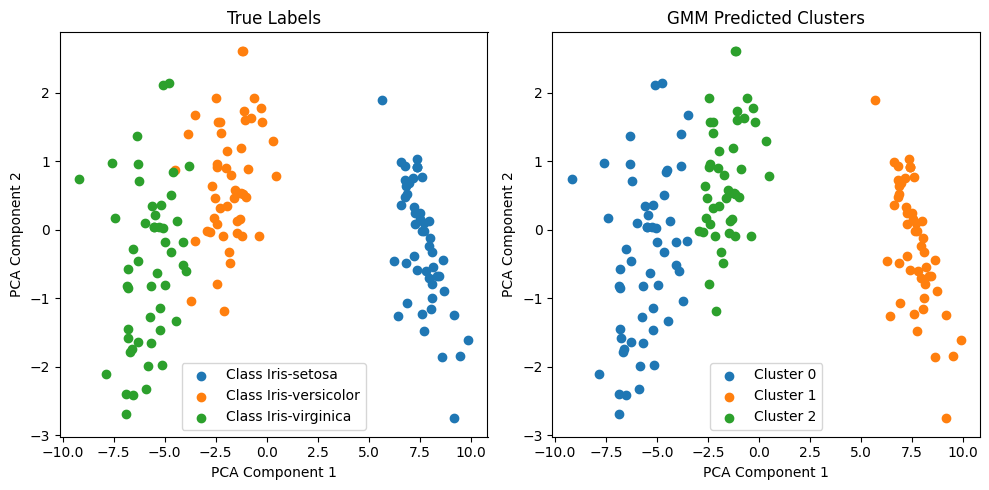

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(features)

y_pred = gmm.predict(features)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
for i in np.unique(target):
    plt.scatter(X_lda[target == i, 0], X_lda[target == i, 1], label=f"Class {target_names[i]}")
plt.title("True Labels")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()

plt.subplot(1, 2, 2)
for i in range(3):  # Number of clusters
    plt.scatter(X_lda[y_pred == i, 0], X_lda[y_pred == i, 1], label=f"Cluster {i}")
plt.title("GMM Predicted Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()

plt.tight_layout()
plt.show()